In [1]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import YOUTUBE_API_KEY
from api_methods import get_channel_stats, get_video_ids

In [2]:
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

# Example: Fetching video statistics
video_id = 'zvxNkUoKbA0'
request = youtube.videos().list(
    part='statistics',
    id=video_id
)
response = request.execute()

statistics = response['items'][0]['statistics']
print(statistics)

{'viewCount': '4786177', 'likeCount': '41344', 'favoriteCount': '0', 'commentCount': '6889'}


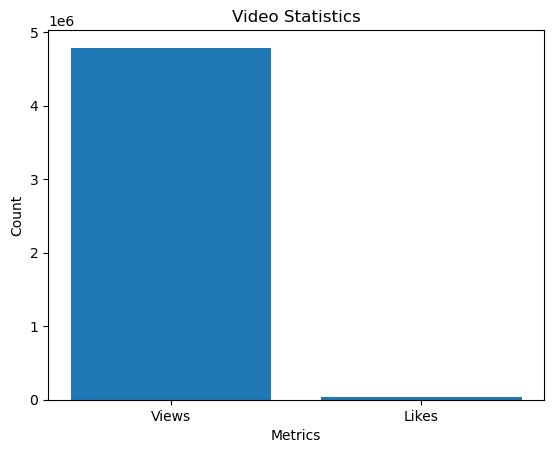

In [11]:
import matplotlib.pyplot as plt

# Assuming 'statistics' contains 'viewCount' and 'likeCount' values
views = int(statistics['viewCount'])
likes = int(statistics['likeCount'])

labels = ['Views', 'Likes']
values = [views, likes]

plt.bar(labels, values)
plt.title('Video Statistics')
plt.xlabel('Metrics')
plt.ylabel('Count')
plt.show()


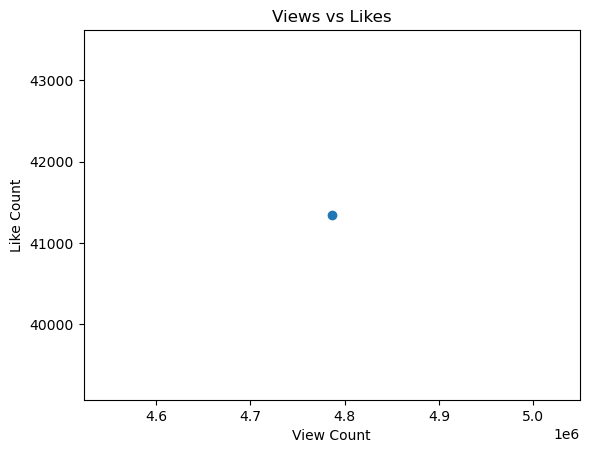

In [12]:
import matplotlib.pyplot as plt

# Assuming 'statistics' contains 'viewCount' and 'likeCount' values
views = int(statistics['viewCount'])
likes = int(statistics['likeCount'])

plt.scatter(views, likes)
plt.title('Views vs Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()


In [13]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    maxResults=100  # İsteğe bağlı: En fazla 100 yorumu almak için
)
response = request.execute()

comments = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for comment in comments:
    print(comment)

Alev gercekten Mustafaya, Umuta birde Nursema nasil yapabildin böyle birseyi.  Insanlari suclayarak kendini Mahsummu zannediyorsun. Tam bir Pisliksin gercekten.
Kadın duyarı kasayım derken metrese yazdıkları sahnelere bak asfhasf  dokunaklı kadın savunucusu yaptılar alev kaşarını da
<a href="https://www.youtube.com/watch?v=zvxNkUoKbA0&amp;t=1h46m59s">1:46:59</a> buda hapse girmesin jsjjshdhsidj
Noldu pembik doğanın ağzına sıçmıştınız el birliğiyle
Her bölümde bir mazeme reklam olunuyur.Bu defaki reklam Pril.😂
Nah yaparsın pinko!
Ömer ölümcül bir ameliyattan sonra ayaklanması duygusallığı dağıttığı hastane lobisinde sohbetler ve duygularını kivilcima açması onu bırak kivilciminda Ertugrul Beye meyillenmesi keyfimi kaçırmadı degil kotuydu 😮😮😮
Doga karakterli insanlar sevimsiz oluyor sonrada bizi sevmiyorlar deniliyor😂
Alevi bin beter olsun yuva yıkan babası yaşındadı
Fatih ilk defa suçsuz 😅
doğa abarttı gercekten
Doqanın sayqısızlıqı
Evin tatlı yılanı kim sizce ?? Bence NİLAY😮😮
Umut’un o

In [32]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    maxResults=100,  # Youtube tek seferde 100 sonuç döndürebilir
)
response = request.execute()

comments_data = []

# Yorumları liste olarak alıp comments_data listesine ekleyelim
for item in response['items']:
    comment_snippet = item['snippet']['topLevelComment']['snippet']
    comments_data.append({
        'Author': comment_snippet['authorDisplayName'],
        'Comment': comment_snippet['textDisplay'],
        'PublishedAt': comment_snippet['publishedAt'],
        'LikeCount': comment_snippet['likeCount'],
        'ReplyCount': item['snippet']['totalReplyCount']
    })
    

# Oluşturduğumuz verileri pandas DataFrame'e dönüştürelim
comments_df = pd.DataFrame(comments_data)

# DataFrame'i gösterelim
print(comments_df)

                 Author                                            Comment  \
0   @umida_abdulazizova                                   Ölan Doğaya oldu   
1              @elifyuk  mihri baba sevgisi görmemiş de değilsin ne bu ...   
2      @berraschannell_  Ertuğrul ve kıvılcım sahneleri&lt;&lt;&lt;&lt;...   
3            @beyza3733  Doğa aşırı gıcık kusurabkmayın da kendimi ezdi...   
4   @kedilereasigim6737  su mihrimahin konusmasi da miy miy icimiz bayi...   
..                  ...                                                ...   
95    @elmirehmedov1259  Alevin hepisinin yaninda umutuda satmasi hic a...   
96      @habibekart6518  Ömer  bu baloncuktan soğuk denize girerekmi ku...   
97            @eylo6027  Alev derdin ne senin? Şu son sahnedeki boş boş...   
98     @sevilgungor8335               Chuky le chuky in gelini😂😂ilahi Doğa   
99       @persian-eb4ot  Fatih karısı için kestiği ahkemleri  alev için...   

             PublishedAt  LikeCount  ReplyCount  
0   2023-12-2

In [28]:
comments_df

,Author,Comment,PublishedAt,LikeCount,ReplyCount
0,@denizusta3306,Fatih&#39;in yaptıklarını bile unutur oldunuz ...,2023-12-24T08:52:56Z,0,0
1,@Eylul0-xj4gc,Şu sinsi doğa insallah diziden cikar ølsun inş...,2023-12-24T08:52:25Z,0,0
2,@gamze5267,Alevin yüzsüzlüğü sinirlerimi tepeme çıkarıyor...,2023-12-24T08:49:07Z,0,0
3,@oezlemgueltaslar8530,"Alev gercekten Mustafaya, Umuta birde Nursema ...",2023-12-24T08:46:48Z,0,0
4,@nevnev8488,Kadın duyarı kasayım derken metrese yazdıkları...,2023-12-24T08:46:38Z,0,0
...,...,...,...,...,...
95,@kamam.tagiyeva7657,Kıvılçim ve ablasi ücün koca tapmak necede kol...,2023-12-24T06:53:54Z,0,0
96,@a.adiguzel2437,"Şimdi Kıvılcım Ertuğrul ile mi devam edecek, Ö...",2023-12-24T06:52:54Z,0,0
97,@TebietOrucov,"Her defasinda ben hasta kadınım, ölürüm diyen ...",2023-12-24T06:51:50Z,1,1
98,@soltansoltan9650,Niyəsə kıvılcımla ərturul heç könlümcə olmadı...,2023-12-24T06:50:04Z,1,0


In [29]:
# CSV olarak kaydetme
comments_df.to_csv('comments_data.csv', index=False)

In [30]:
# LikeCount'a göre sıralama
sorted_comments = comments_df.sort_values(by='LikeCount', ascending=False)

# En yüksek beğeni alan yorumları gösterme
sorted_comments.head()


,Author,Comment,PublishedAt,LikeCount,ReplyCount
71,@HilalUnal-do4vu,Bu dizi kesinlikle final olmamalıydı rolünün ...,2023-12-24T07:29:49Z,4,0
77,@esrayut,Doğaya gicik olan bi ben miyim,2023-12-24T07:18:58Z,4,1
74,@trnakmanya7519,Fatin in odasındaki tabloların korkunçluğu,2023-12-24T07:21:36Z,3,0
30,@nurayakay4251,Umut ve Alev dostluğu o kadar toksik ki. Alev ...,2023-12-24T08:18:43Z,2,0
34,@elmirehmedov1259,Alevin hepisinin yaninda umutuda satmasi hic a...,2023-12-24T08:15:01Z,2,0


In [35]:
channel_id = 'UCRfLDCtkSwmTdwHrbmC78Xg'  # İzlenme sayılarını almak istediğiniz kanal ID'si

# Kanala ait videoları çekme isteği
request = youtube.search().list(
    part='snippet',
    channelId=channel_id,
    type='video',
    maxResults=50  # İsteğe bağlı: En fazla 50 video almak için
)
response = request.execute()

video_ids = [item['id']['videoId'] for item in response['items']]

video_statistics = {}

# Her bir videonun istatistiklerini alalım
for video_id in video_ids:
    video_request = youtube.videos().list(
        part='statistics',
        id=video_id
    )
    video_response = video_request.execute()

    statistics = video_response['items'][0]['statistics']
    view_count = int(statistics['viewCount'])

    video_statistics[video_id] = view_count

print(video_statistics)

{'B9UZfHj9tLE': 174070, '28R3vqdAQ28': 224687, 'u2zsAZqNRB0': 1941950, 'j9KECf1QJC4': 2548179, 'NoZi8TzkH18': 2061065, 'Mk4vH7xWBKs': 2948462, 'o2nd_EV5how': 477231, 'RAeHkok2iNw': 28541, '6nlosraOGSU': 2508420, 'thRbmmidA7g': 46586, 'rN0LKmH6MJE': 4708486, 'xZwsvk3ZaHY': 2259525, 'fl2XvjtLUjk': 447020, 'NkiwjRbOF_E': 3357264, 'jV29gvZelu4': 3593447, '4Lpvmsi88o4': 2833537, 'YOcoGgk8UbA': 1756404, '7WEViRdLsb4': 1922098, 'h2lqFv14HKA': 2495586, 'APZ74ujs0RQ': 94176, 'TJK8nKCtOLw': 3260914, 'qNtufNt4rvg': 3947618, 'Zqca5SAgFXs': 246904, 'gtWJD73DXq0': 50771, 'isP14pI27As': 3023091, 'FmXGEbnK1Ec': 3548633, 'Td3s4FgHnOY': 3414654, '5AWjWTGs_iI': 191407, '_r7UGqjmZ5c': 27543, 'QGzN2w5qDtk': 704700, 'YMHKd9HBu0w': 700758, 'uys1bJ3KJC0': 2540581, 'U8cm1Hmtk4Y': 2992009, 'KUwfcIzVNpc': 43526, 'LD5XnNx17BU': 3899334, 'pw_PIvL2Zwk': 718396, 'mktUFDvBpXU': 78289, 'v9GfE3Mjk_g': 260281, 'ujxc_etvpDg': 929967, 'W_GIJF6ajzI': 400265, 'WCjPCg9fF9A': 1000066, 'wLdRB3wGPbk': 151823, 'BAINXYSbh_8': 234

In [36]:
df = pd.DataFrame(list(video_statistics.items()), columns=['VideoID', 'ViewCount'])

In [37]:
df

,VideoID,ViewCount
0,B9UZfHj9tLE,174070
1,28R3vqdAQ28,224687
2,u2zsAZqNRB0,1941950
3,j9KECf1QJC4,2548179
4,NoZi8TzkH18,2061065
5,Mk4vH7xWBKs,2948462
6,o2nd_EV5how,477231
7,RAeHkok2iNw,28541
8,6nlosraOGSU,2508420
9,thRbmmidA7g,46586


In [41]:


video_data = []

request = youtube.search().list(
    part='snippet',
    channelId=channel_id,
    type='video',
    maxResults=50  # Her istekte en fazla 50 video alınabilir
)
response = request.execute()

video_ids = [item['id']['videoId'] for item in response['items']]

for video_id in video_ids:
    video_request = youtube.videos().list(
        part='snippet,statistics',
        id=video_id
    )
    video_response = video_request.execute()

    snippet = video_response['items'][0]['snippet']
    statistics = video_response['items'][0]['statistics']

    title = snippet['title']
    view_count = int(statistics['viewCount'])
    like_count = int(statistics.get('likeCount', 0))
    video_id = video_response['items'][0]['id']

    video_data.append({
        'VideoID': video_id,
        'Title': title,
        'ViewCount': view_count,
        'LikeCount': like_count
    })

# DataFrame oluşturma
df = pd.DataFrame(video_data)

print(df)


        VideoID                                              Title  ViewCount  \
0   B9UZfHj9tLE        🎶 Aşkın olayım… 💘🔥 #KızılcıkŞerbeti #shorts     174071   
1   28R3vqdAQ28  #KızılcıkŞerbeti'nin 43. Bölüm setinden eğlenc...     224697   
2   u2zsAZqNRB0  "Alev bi dur artık!" 😅 | #KızılcıkŞerbeti #shorts    1941963   
3   j9KECf1QJC4  ​Kızılcık Şerbeti 24. Bölüm 2. Fragman | "Ben ...    2548179   
4   NoZi8TzkH18  ​Kızılcık Şerbeti 44. Bölüm 2. Fragman | "Sen ...    2061116   
5   Mk4vH7xWBKs  ​Kızılcık Şerbeti 24. Bölüm 1. Fragman | "Haya...    2948462   
6   o2nd_EV5how         Kızılcık Şerbeti İlk Sezon - (CANLI YAYIN)     477318   
7   RAeHkok2iNw  Koyun can, kasap et derdinde! | Kızılcık Şerbe...      28541   
8   6nlosraOGSU  ​Kızılcık Şerbeti 27. Bölüm 2. Fragman | “Umut...    2508420   
9   thRbmmidA7g  "Sen ne istersen onu yapmaya karar verdim..." ...      46593   
10  rN0LKmH6MJE  Nursema'nın bakışı nasıl ortaya çıktı? 🙄 | #Kı...    4708561   
11  xZwsvk3ZaHY  ​Kızılcık Ş

In [42]:
df

,VideoID,Title,ViewCount,LikeCount
0,B9UZfHj9tLE,🎶 Aşkın olayım… 💘🔥 #KızılcıkŞerbeti #shorts,174071,3578
1,28R3vqdAQ28,#KızılcıkŞerbeti'nin 43. Bölüm setinden eğlenc...,224697,957
2,u2zsAZqNRB0,"""Alev bi dur artık!"" 😅 | #KızılcıkŞerbeti #shorts",1941963,30081
3,j9KECf1QJC4,"​Kızılcık Şerbeti 24. Bölüm 2. Fragman | ""Ben ...",2548179,22242
4,NoZi8TzkH18,"​Kızılcık Şerbeti 44. Bölüm 2. Fragman | ""Sen ...",2061116,11458
5,Mk4vH7xWBKs,"​Kızılcık Şerbeti 24. Bölüm 1. Fragman | ""Haya...",2948462,19010
6,o2nd_EV5how,Kızılcık Şerbeti İlk Sezon - (CANLI YAYIN),477318,1815
7,RAeHkok2iNw,"Koyun can, kasap et derdinde! | Kızılcık Şerbe...",28541,203
8,6nlosraOGSU,​Kızılcık Şerbeti 27. Bölüm 2. Fragman | “Umut...,2508420,17265
9,thRbmmidA7g,"""Sen ne istersen onu yapmaya karar verdim..."" ...",46593,1062


In [44]:
# DataFrame'i izlenme sayısına göre sıralama
sorted_df = df.sort_values(by='ViewCount', ascending=False)

sorted_df

,VideoID,Title,ViewCount,LikeCount
10,rN0LKmH6MJE,Nursema'nın bakışı nasıl ortaya çıktı? 🙄 | #Kı...,4708561,75617
21,qNtufNt4rvg,​Kızılcık Şerbeti 20. Bölüm 2. Fragman | “Bu r...,3947618,52333
34,LD5XnNx17BU,"​Kızılcık Şerbeti 26. Bölüm 1. Fragman | ""İhan...",3899328,31648
14,jV29gvZelu4,"​Kızılcık Şerbeti 20. Bölüm 1. Fragman | ""Tek ...",3593447,21383
25,FmXGEbnK1Ec,"​Kızılcık Şerbeti 28. Bölüm 1. Fragman | ""Doğa...",3548631,23201
26,Td3s4FgHnOY,​Kızılcık Şerbeti 23. Bölüm 1. Fragman | Yeni ...,3414654,19128
13,NkiwjRbOF_E,"​Kızılcık Şerbeti 21. Bölüm 2. Fragman | ""Alev...",3357258,27264
20,TJK8nKCtOLw,​Kızılcık Şerbeti 22. Bölüm 1. Fragman | “Bizi...,3260914,24045
24,isP14pI27As,"​Kızılcık Şerbeti 25. Bölüm 2. Fragman | ""Nası...",3023091,29440
32,U8cm1Hmtk4Y,​Kızılcık Şerbeti 23. Bölüm 2. Fragman | Yeni ...,2992009,15903


C:\Users\yason\AppData\Local\Temp\ipykernel_2548\1614899323.py:9: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  plt.tight_layout()
C:\Users\yason\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


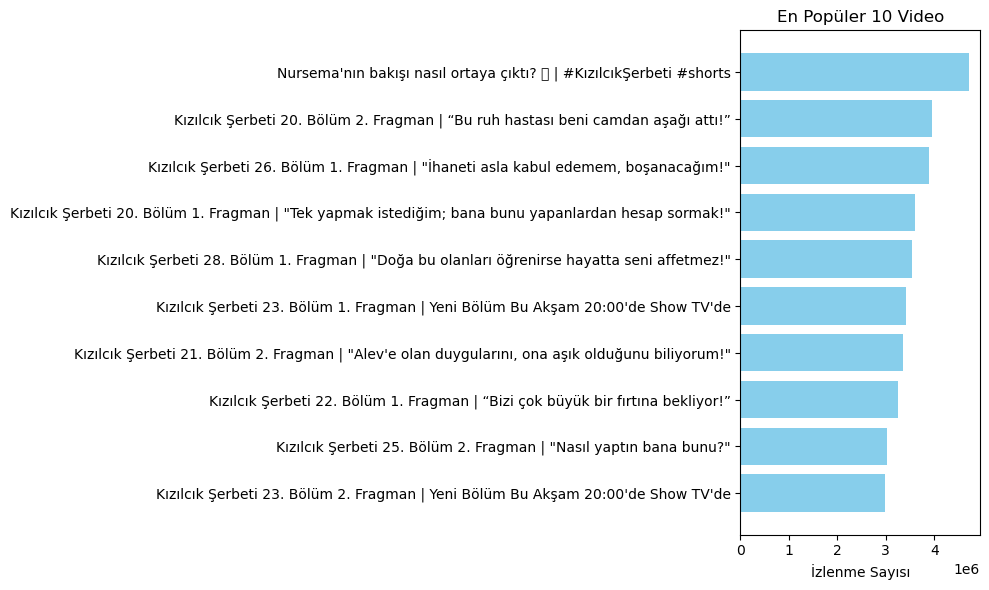

In [45]:

# İlk 10 videonun bilgilerini alalım
top_10_videos = sorted_df.head(10)

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
plt.barh(top_10_videos['Title'][::-1], top_10_videos['ViewCount'][::-1], color='skyblue')
plt.xlabel('İzlenme Sayısı')
plt.title('En Popüler 10 Video')
plt.tight_layout()

plt.show()


In [47]:
# Sıra numarası ekleme
sorted_df['ID'] = sorted_df.index + 1 #Index numaralı df üzerinden verildiği için burada sorted_df ile gösterim yanlış oluyor.

sorted_df.head(10)

,VideoID,Title,ViewCount,LikeCount,ID
10,rN0LKmH6MJE,Nursema'nın bakışı nasıl ortaya çıktı? 🙄 | #Kı...,4708561,75617,11
21,qNtufNt4rvg,​Kızılcık Şerbeti 20. Bölüm 2. Fragman | “Bu r...,3947618,52333,22
34,LD5XnNx17BU,"​Kızılcık Şerbeti 26. Bölüm 1. Fragman | ""İhan...",3899328,31648,35
14,jV29gvZelu4,"​Kızılcık Şerbeti 20. Bölüm 1. Fragman | ""Tek ...",3593447,21383,15
25,FmXGEbnK1Ec,"​Kızılcık Şerbeti 28. Bölüm 1. Fragman | ""Doğa...",3548631,23201,26
26,Td3s4FgHnOY,​Kızılcık Şerbeti 23. Bölüm 1. Fragman | Yeni ...,3414654,19128,27
13,NkiwjRbOF_E,"​Kızılcık Şerbeti 21. Bölüm 2. Fragman | ""Alev...",3357258,27264,14
20,TJK8nKCtOLw,​Kızılcık Şerbeti 22. Bölüm 1. Fragman | “Bizi...,3260914,24045,21
24,isP14pI27As,"​Kızılcık Şerbeti 25. Bölüm 2. Fragman | ""Nası...",3023091,29440,25
32,U8cm1Hmtk4Y,​Kızılcık Şerbeti 23. Bölüm 2. Fragman | Yeni ...,2992009,15903,33


In [48]:
# İndeks sıfırlama yapılmalı
sorted_df.reset_index(drop=True, inplace=True)

# Sıra numarası ekleme
sorted_df['ID'] = sorted_df.index + 1

In [49]:
sorted_df

,VideoID,Title,ViewCount,LikeCount,ID
0,rN0LKmH6MJE,Nursema'nın bakışı nasıl ortaya çıktı? 🙄 | #Kı...,4708561,75617,1
1,qNtufNt4rvg,​Kızılcık Şerbeti 20. Bölüm 2. Fragman | “Bu r...,3947618,52333,2
2,LD5XnNx17BU,"​Kızılcık Şerbeti 26. Bölüm 1. Fragman | ""İhan...",3899328,31648,3
3,jV29gvZelu4,"​Kızılcık Şerbeti 20. Bölüm 1. Fragman | ""Tek ...",3593447,21383,4
4,FmXGEbnK1Ec,"​Kızılcık Şerbeti 28. Bölüm 1. Fragman | ""Doğa...",3548631,23201,5
5,Td3s4FgHnOY,​Kızılcık Şerbeti 23. Bölüm 1. Fragman | Yeni ...,3414654,19128,6
6,NkiwjRbOF_E,"​Kızılcık Şerbeti 21. Bölüm 2. Fragman | ""Alev...",3357258,27264,7
7,TJK8nKCtOLw,​Kızılcık Şerbeti 22. Bölüm 1. Fragman | “Bizi...,3260914,24045,8
8,isP14pI27As,"​Kızılcık Şerbeti 25. Bölüm 2. Fragman | ""Nası...",3023091,29440,9
9,U8cm1Hmtk4Y,​Kızılcık Şerbeti 23. Bölüm 2. Fragman | Yeni ...,2992009,15903,10


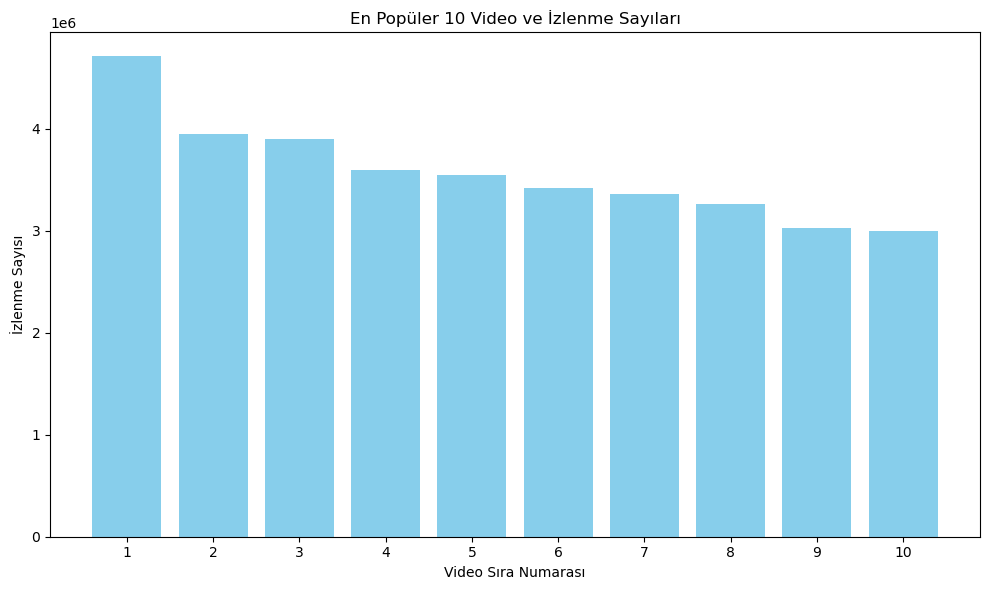

In [61]:

# En popüler 10 videoyu seçme
top_10_videos = sorted_df.head(10)

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(top_10_videos['ID'], top_10_videos['ViewCount'], color='skyblue')
plt.xlabel('Video Sıra Numarası')
plt.ylabel('İzlenme Sayısı')
plt.title('En Popüler 10 Video ve İzlenme Sayıları')
plt.xticks(top_10_videos['ID'])
plt.tight_layout()



plt.show()


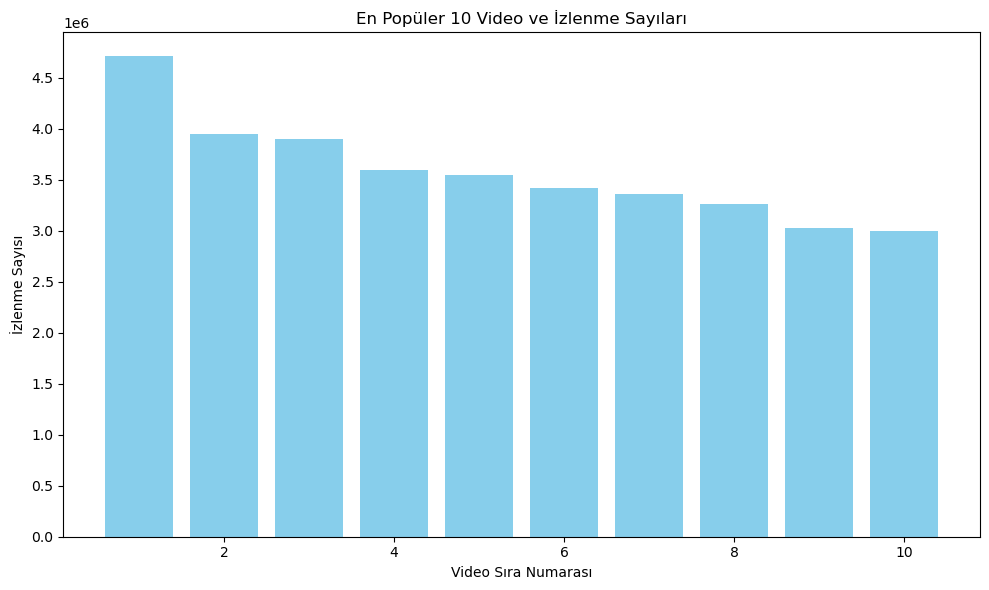

In [67]:
from matplotlib.ticker import MaxNLocator

# En popüler 10 videoyu seçme
top_10_videos = sorted_df.head(10)

# Çubuk grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_videos['ID'], top_10_videos['ViewCount'], color='skyblue')
ax.set_xlabel('Video Sıra Numarası')
ax.set_ylabel('İzlenme Sayısı')
ax.set_title('En Popüler 10 Video ve İzlenme Sayıları')

# İzlenme sayılarını kesirli göstermekten kaçınıp tam sayılarla gösterme
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [69]:
sorted_df.to_csv('top_10_videos.csv', index=False)